# Computer Vision (Image operators and filters)

By the end of this lab, you will get hands on experience working with:

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques

<!-- ### **Remember this is a graded exercise.** -->

**Reminder**:

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---


In [ ]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
from skimage import data, exposure, filters, io, morphology

# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

![image.png](attachment:image.png)

> Add blockquote



*   Visualize the created images in a 1 x 3 subplot using matplotlib.


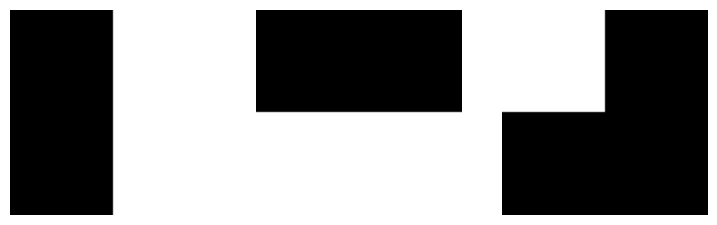

In [15]:
#Create a 100 x 100 image for each of the below visualization

img1 = np.zeros((100, 100), dtype=np.uint8)
img1[:, 50:] = 255

img2 = np.zeros((100, 100), dtype=np.uint8)
img2[50:, :] = 255

img3 = np.zeros((100, 100), dtype=np.uint8)
img3[:50, :50] = 255

fig, axes = plt.subplots(1, 3, figsize=(9, 3))

axes[0].imshow(img1, cmap='gray')
axes[0].axis('off')

axes[1].imshow(img2, cmap='gray')
axes[1].axis('off')

axes[2].imshow(img3, cmap='gray')
axes[2].axis('off')

plt.show()

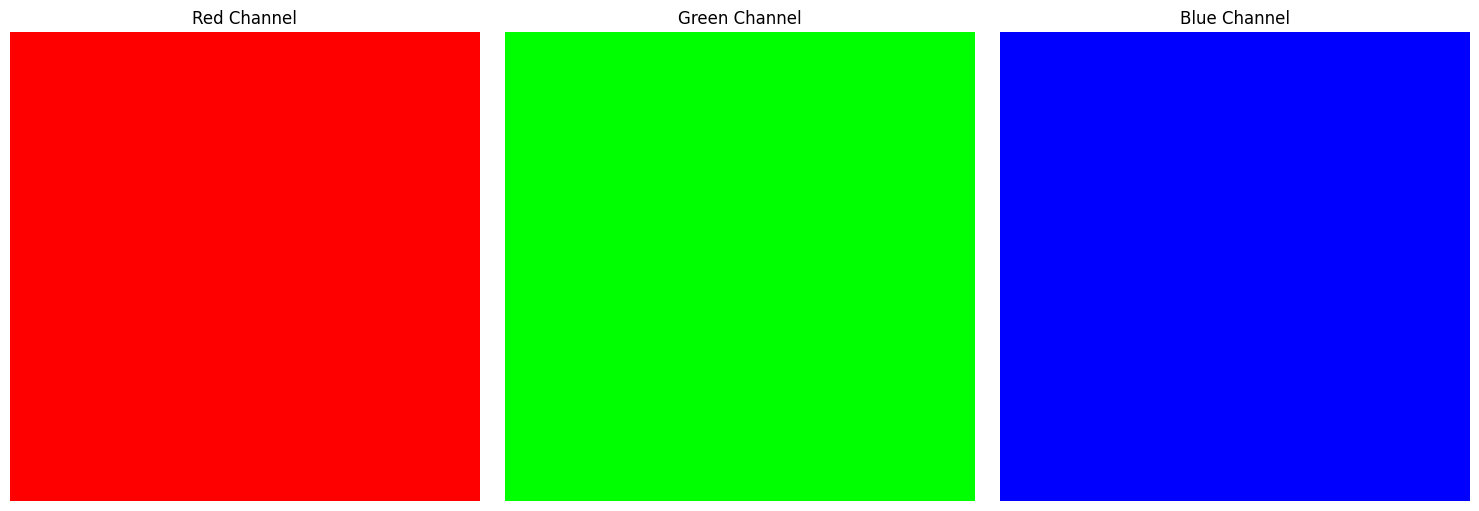

In [8]:
# Create a 100 x 100 image for each color channel
red_image = np.zeros((100, 100, 3), dtype=np.uint8)
red_image[:, :, 0] = 255  # Set the red channel to maximum

green_image = np.zeros((100, 100, 3), dtype=np.uint8)
green_image[:, :, 1] = 255  # Set the green channel to maximum

blue_image = np.zeros((100, 100, 3), dtype=np.uint8)
blue_image[:, :, 2] = 255  # Set the blue channel to maximum

# Create subplots to visualize the images
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Display the red image
ax[0].imshow(red_image)
ax[0].axis('off')  # Hide axes
ax[0].set_title('Red Channel')

# Display the green image
ax[1].imshow(green_image)
ax[1].axis('off')  # Hide axes
ax[1].set_title('Green Channel')

# Display the blue image
ax[2].imshow(blue_image)
ax[2].axis('off')  # Hide axes
ax[2].set_title('Blue Channel')

# Show the plot
plt.tight_layout()
plt.show()

*   Use the above three images to create the following image

![image-2.png](attachment:image-2.png)
*Hint: Remember channels and color spaces*

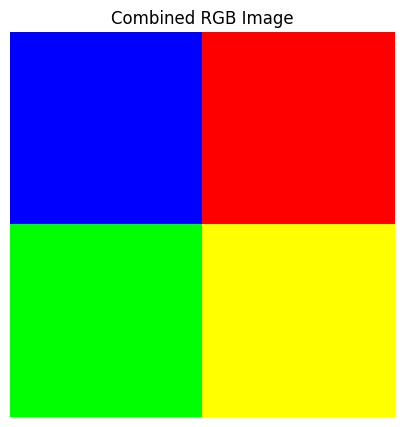

In [17]:

# Combine the channels to create the final RGB image
combined_image = np.zeros((100, 100, 3), dtype=np.uint8)
combined_image[:50, :50, 2] = 255
combined_image[:50, 50:, 0] = 255
combined_image[50:, :50, 1] = 255



combined_image[50:, 50:, 0] = 255  # Red
combined_image[50:, 50:, 1] = 255  # Green

# Display the combined image
plt.figure(figsize=(5, 5))
plt.imshow(combined_image)
plt.axis('off')  # Hide axes
plt.title('Combined RGB Image')
plt.show()

# Optionally, save the combined image
plt.imsave('image-2.png', combined_image)

### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder

![image.png](attachment:image.png)

*   Extract individual channels and plot them using matplotlib subplot.



In [18]:
import cv2
from PIL import Image

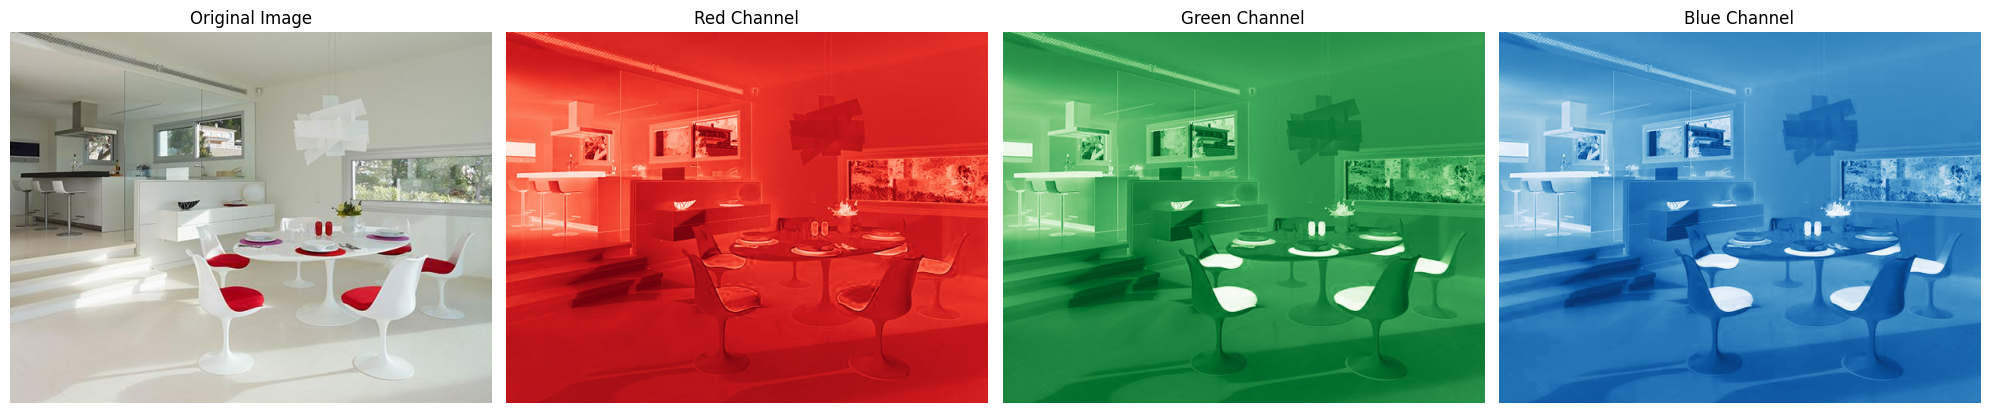

In [19]:
image_path = '/content/images/sillas.jpg'
image = Image.open(image_path)
image = np.array(image)

if image.shape[2] == 4:
    image = image[:, :, :3]

red_channel = image[:, :, 0]
green_channel = image[:, :, 1]
blue_channel = image[:, :, 2]

fig, ax = plt.subplots(ncols=4, figsize=(20, 5))

ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(red_channel, cmap='Reds')
ax[1].set_title('Red Channel')
ax[1].axis('off')

ax[2].imshow(green_channel, cmap='Greens')
ax[2].set_title('Green Channel')
ax[2].axis('off')

ax[3].imshow(blue_channel, cmap='Blues')
ax[3].set_title('Blue Channel')
ax[3].axis('off')

plt.tight_layout()
plt.show()



*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using matplotlib subplot.

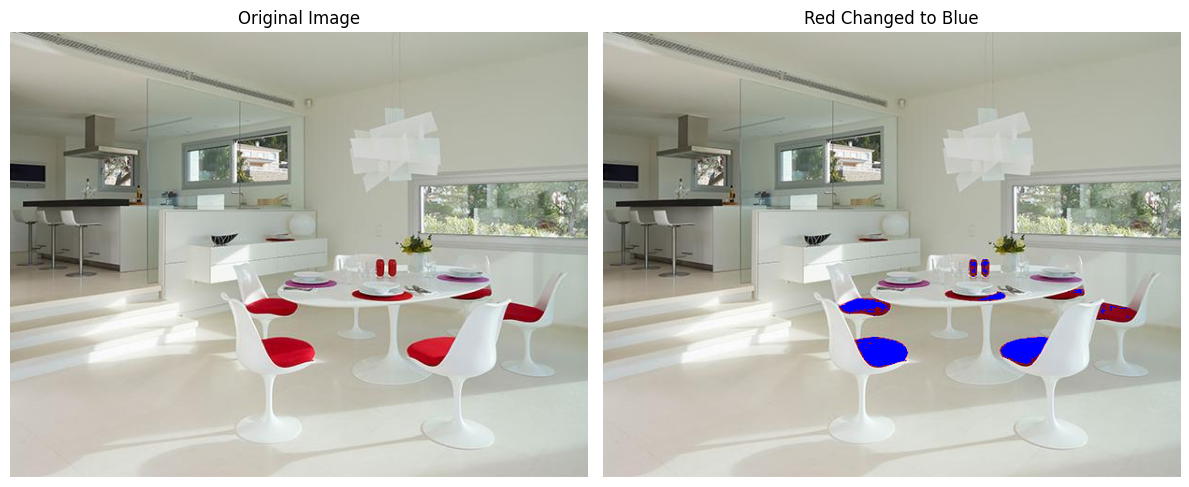

In [20]:
# solution


if image.shape[2] == 4:
    image = image[:, :, :3]

modified_image = np.copy(image)


red_threshold = 150


mask = (modified_image[:, :, 0] > red_threshold) & (modified_image[:, :, 1] < 100) & (modified_image[:, :, 2] < 100)
modified_image[mask] = [0, 0, 255]


fig, ax = plt.subplots(ncols=2, figsize=(12, 6))

ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(modified_image)
ax[1].set_title('Red Changed to Blue')
ax[1].axis('off')

plt.tight_layout()
plt.show()

# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*

![image.png](attachment:image.png)

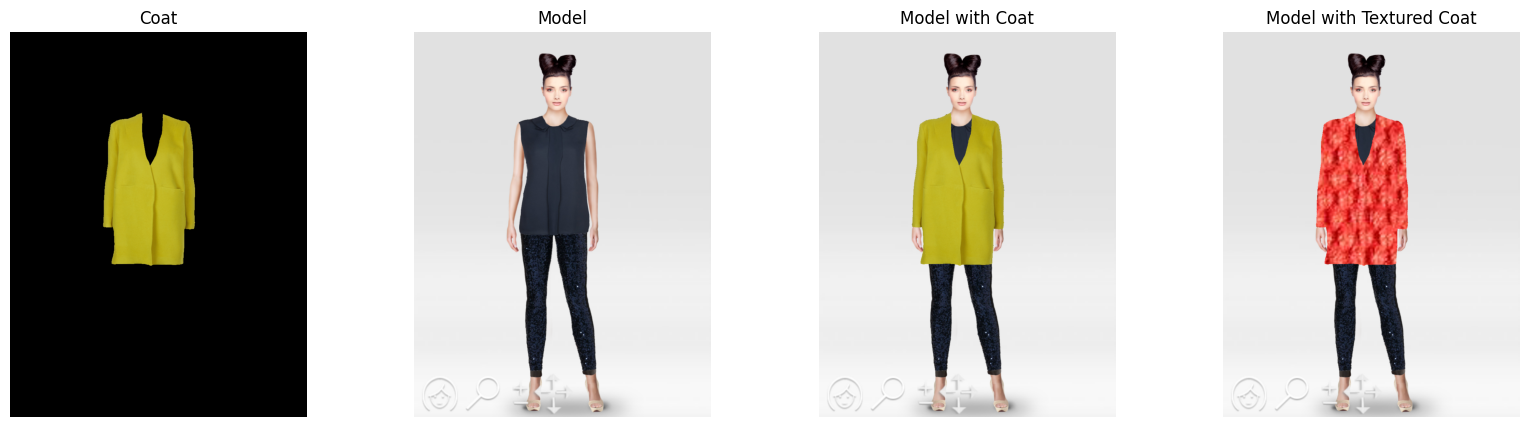

In [31]:

# Load the T-shirt image and the design image
tshirt_image_path = '/content/images/model.png'   # Path to T-shirt image
design_image_path = '/content/images/coat.png'    # Path to design image
texture_image_path = '/content/images/texture2.png'    # Path to texture image


# Read the images
tshirt_img = cv2.imread(tshirt_image_path )
design_img = cv2.imread(design_image_path )
texture_img = cv2.imread(texture_image_path)



# Convert images to RGB
tshirt = cv2.cvtColor(tshirt_img, cv2.COLOR_BGR2RGB)
design = cv2.cvtColor(design_img, cv2.COLOR_BGR2RGB)
texture = cv2.cvtColor(texture_img, cv2.COLOR_BGR2RGB)


coat_gray = cv2.cvtColor(design, cv2.COLOR_RGB2GRAY)
_, mask = cv2.threshold(coat_gray, 1, 255, cv2.THRESH_BINARY)

# Ensure the coat fits onto the model
coat_resized = cv2.resize(design, (tshirt.shape[1], tshirt.shape[0]))
mask_resized = cv2.resize(mask, (tshirt.shape[1], tshirt.shape[0]))

# Overlay the coat onto the model
model_with_coat = tshirt.copy()
model_with_coat[mask_resized > 0] = coat_resized[mask_resized > 0]

# Apply the texture to the coat area
texture_resized = cv2.resize(texture, (coat_resized.shape[1], coat_resized.shape[0]))
coat_textured = coat_resized.copy()
coat_textured[mask_resized > 0] = texture_resized[mask_resized > 0]

# Overlay the textured coat onto the model
model_with_textured_coat = tshirt.copy()
model_with_textured_coat[mask_resized > 0] = coat_textured[mask_resized > 0]

# Display the final image using Matplotlib

fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes[1].imshow(tshirt)
axes[1].set_title("Model")
axes[1].axis("off")

axes[0].imshow(design)
axes[0].set_title("Coat")
axes[0].axis("off")

axes[2].imshow(model_with_coat)
axes[2].set_title("Model with Coat")
axes[2].axis("off")

#Model with textured coat
axes[3].imshow(model_with_textured_coat)
axes[3].set_title("Model with Textured Coat")
axes[3].axis("off")


plt.show()


# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




In [38]:
from skimage import data,io, color
from skimage import exposure

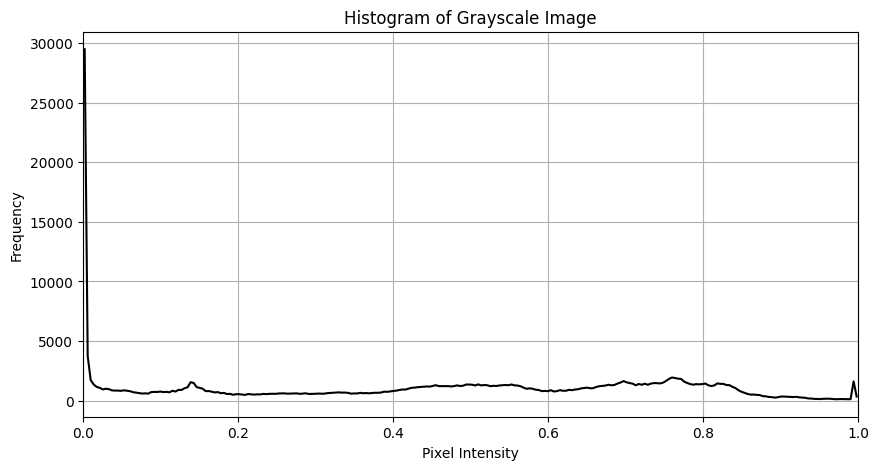

In [39]:

# Step 1: Load the image
astronaut_image = data.astronaut()

# Step 2: Convert the image to grayscale
gray_image = color.rgb2gray(astronaut_image)

# Step 3: Compute the histogram
histogram, bin_edges = exposure.histogram(gray_image)

# Step 4: Plot the histogram
plt.figure(figsize=(10, 5))
plt.plot(bin_edges, histogram, color='black')  # Plot the histogram (using bin_edges directly)
plt.title('Histogram of Grayscale Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 1])  # Since gray_image is in [0, 1] range
plt.grid()
plt.show()



```
# This is formatted as code
```

*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.

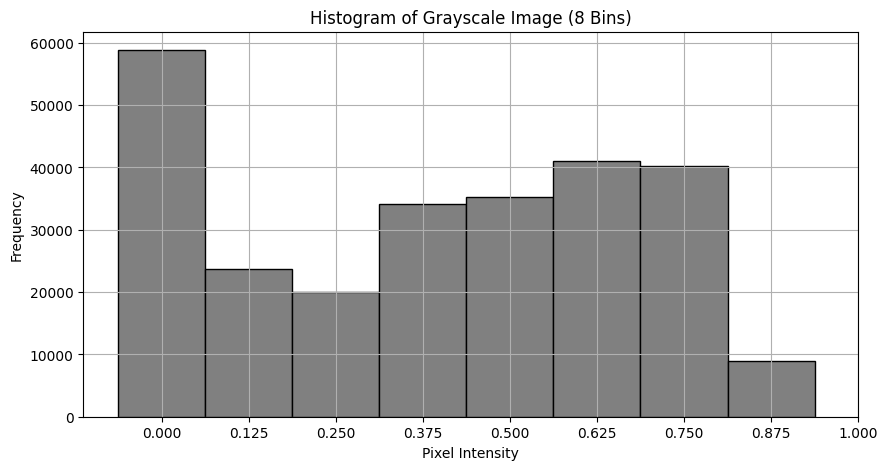

In [52]:
# Step 1: Load the image
astronaut_image = data.astronaut()

# Step 2: Convert the image to grayscale
gray_image = color.rgb2gray(astronaut_image)

# Step 3: Compute the histogram with 8 bins
histogram, bin_edges = np.histogram(gray_image, bins=8, range=(0, 1))

# Step 4: Plot the histogram
plt.figure(figsize=(10, 5))

plt.bar(bin_edges[:-1], histogram, width=np.diff(bin_edges),  color='gray', edgecolor='black')


plt.title('Histogram of Grayscale Image (8 Bins)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xticks(bin_edges)  # Set x-ticks to be at the bin edges
plt.grid()
plt.show()




*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?



**Solution**

Changing the bin count in a histogram affects data visualization and interpretation. A low bin count may hide important details, while a high count can introduce noise and exaggerate small fluctuations. Choosing the right bin count requires a balance between clarity and detail, depending on the data distribution and the insights to be extracted.
...


*   Compute histogram of the color image (without converting it to grayscale).
*   Plot the total histogram and also histogram for each channel (show it in a single plot with differnt legends for each histogram).


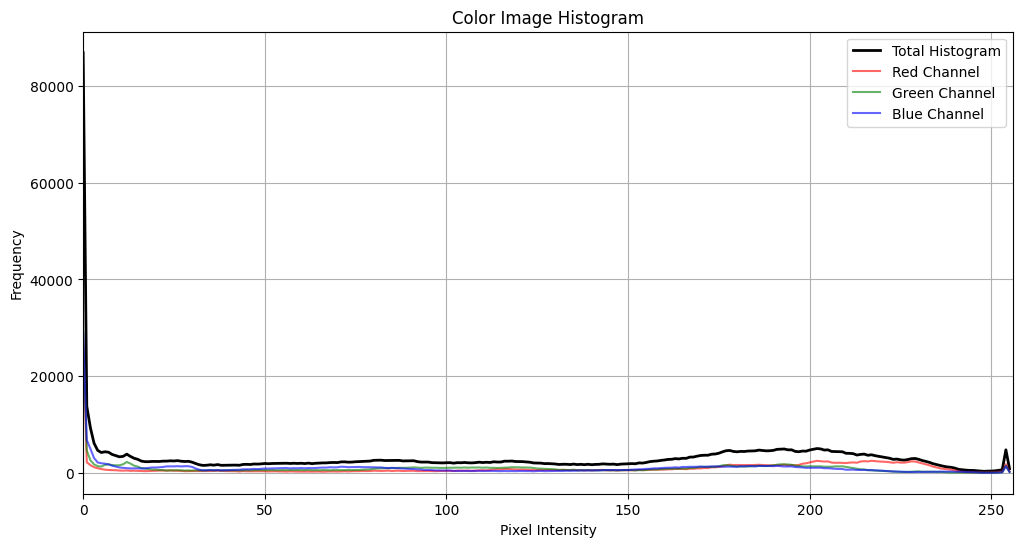

In [55]:

# Step 1: Load the color image
color_image = data.astronaut()

# Step 2: Compute the histogram for each channel
red_channel = color_image[:, :, 0]
green_channel = color_image[:, :, 1]
blue_channel = color_image[:, :, 2]

# Step 3: Calculate histograms
hist_red, bins_red = np.histogram(red_channel, bins=256, range=(0, 256))
hist_green, bins_green = np.histogram(green_channel, bins=256, range=(0, 256))
hist_blue, bins_blue = np.histogram(blue_channel, bins=256, range=(0, 256))

# Step 4: Compute total histogram
total_histogram = hist_red + hist_green + hist_blue

# Step 5: Plotting
plt.figure(figsize=(12, 6))

# Plot total histogram
plt.subplot(1, 1, 1)
plt.plot(total_histogram, color='black', label='Total Histogram', linewidth=2)

# Plot individual channel histograms
plt.plot(hist_red, color='red', label='Red Channel', alpha=0.6)
plt.plot(hist_green, color='green', label='Green Channel', alpha=0.6)
plt.plot(hist_blue, color='blue', label='Blue Channel', alpha=0.6)

# Step 6: Customize the plot
plt.title('Color Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.xlim([0, 256])
plt.grid()
plt.show()


### **Exercise: Histogram Equalization**

*   Read 'aquatermi_lowcontrast.jpg' image from the images folder.
*   Compute the histogram of the image.
*   Perform histogram equalization of the image to enhance the contrast. *Hint: Use equalize_hist function available in skimage.exposure*
*   Also compute histogram of the equalized image.
*   Use 2 x 2 subplot to show the original image and the enhanced image along with the corresponding histograms.



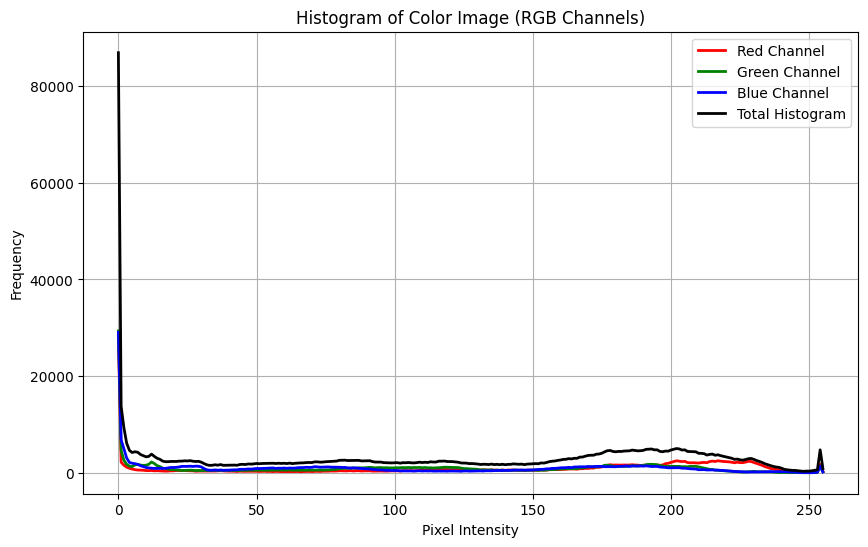

In [64]:
image = data.astronaut()

red_channel = image[:, :, 0]
green_channel = image[:, :, 1]
blue_channel = image[:, :, 2]

hist_red, bins_red = np.histogram(red_channel, bins=256, range=(0, 256))
hist_green, bins_green = np.histogram(green_channel, bins=256, range=(0, 256))
hist_blue, bins_blue = np.histogram(blue_channel, bins=256, range=(0, 256))

plt.figure(figsize=(10, 6))
plt.plot(bins_red[:-1], hist_red, color='red', label='Red Channel', lw=2)
plt.plot(bins_green[:-1], hist_green, color='green', label='Green Channel', lw=2)
plt.plot(bins_blue[:-1], hist_blue, color='blue', label='Blue Channel', lw=2)

total_hist = hist_red + hist_green + hist_blue
plt.plot(bins_red[:-1], total_hist, color='black', label='Total Histogram', lw=2)

plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Histogram of Color Image (RGB Channels)')
plt.legend()
plt.grid(True)
plt.show()




*   The above function in skimage.exposure uses cdf and interpolation technique to normalize the histogram. How is it different from linear contrast stretch?


**Solution**

Histogram equalization uses the cumulative distribution function (CDF) to redistribute pixel intensities, enhancing local contrast and producing a more uniform histogram. In contrast, linear contrast stretching linearly maps pixel values to a new range based on the minimum and maximum values, preserving the distribution shape. While equalization can significantly alter the image's appearance, stretching results in a more uniform look without major changes to content.
...

### **Exercise: Linear Contrast Stretch**

*   Write a function to compute the linear contrast stretch (Do not use an inbuilt function).
*   Provide grayscale image array and bin count as parameters to the function and return the enhanced image array.
*   Use a 2 x 2 plot to visualize the original image, histogram, enhanced image and the corresponding histogram.



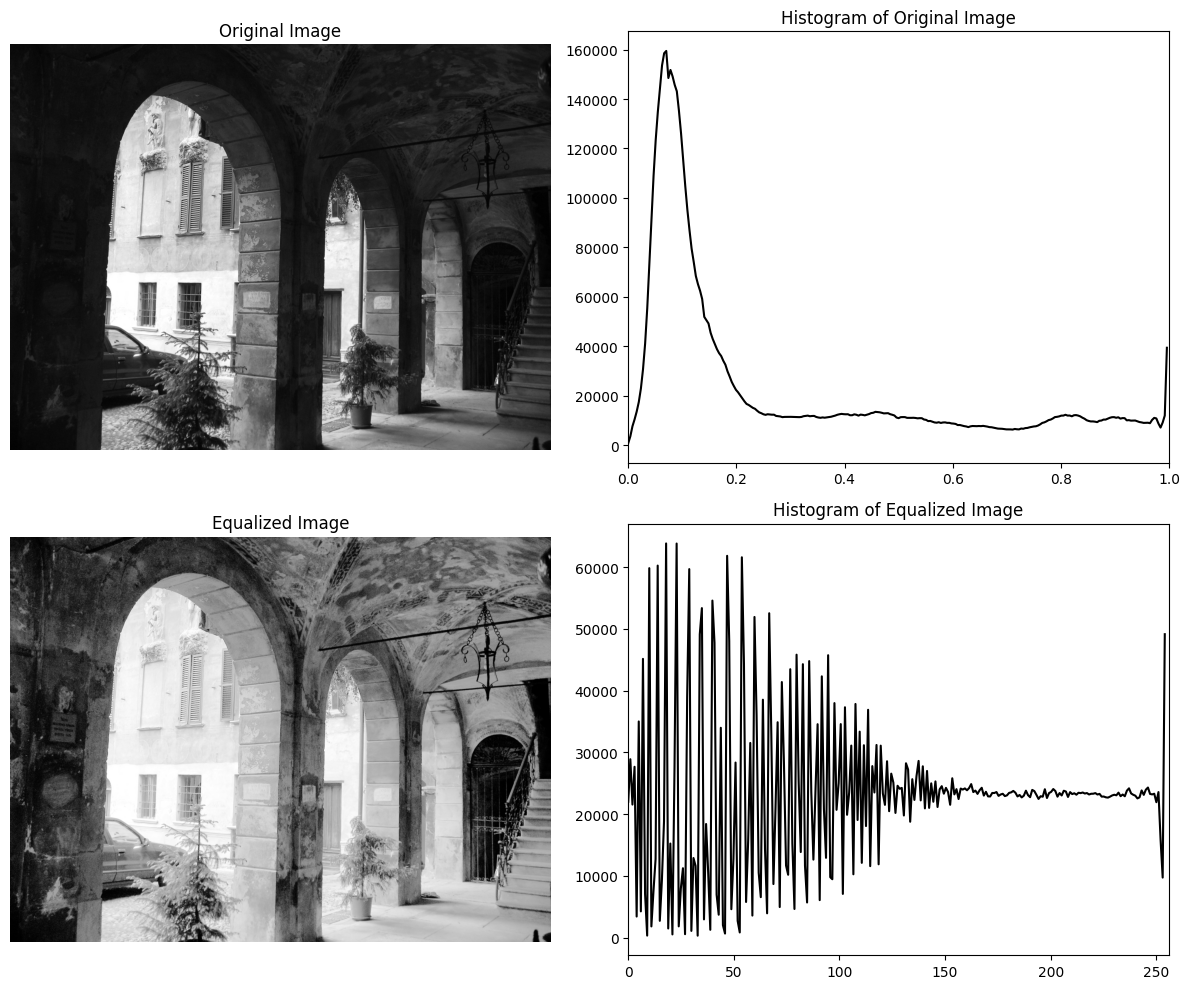

In [68]:

def linear_contrast_stretch(image, num_bins=256):
    # Step 1: Get minimum and maximum pixel values
    min_pixel = np.min(image)
    max_pixel = np.max(image)

    # Step 2: Scale pixel values to the range [0, 255]
    stretched_image = ((image - min_pixel) / (max_pixel - min_pixel) * 255).astype(np.uint8)

    return stretched_image

# Step 1: Load the image
image_path = "/content/images/aquatermi_lowcontrast.jpg"
original_image = io.imread(image_path, as_gray=True)


# Step 4: Apply linear contrast stretch
enhanced_image = linear_contrast_stretch(original_image)


# Step 2: Compute the histogram of the original image
hist_original, bins_original = np.histogram(original_image.flatten(), bins=256, range=(0, 1))

# Step 3: Perform histogram equalization
equalized_image = exposure.equalize_hist(original_image)

# Step 4: Compute the histogram of the equalized image
hist_equalized, bins_equalized = np.histogram(equalized_image.flatten(), bins=256, range=(0, 1))

# Step 5: Plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Original image
axs[0, 0].imshow(original_image, cmap='gray')
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

 # Histogram of the original image
axs[0, 1].plot(bins_original[:-1], hist_original, color='black')
axs[0, 1].set_title('Histogram of Original Image')
axs[0, 1].set_xlim([0, 1])

# Equalized image
axs[1, 0].imshow(equalized_image, cmap='gray')
axs[1, 0].set_title('Equalized Image')
axs[1, 0].axis('off')

# Histogram of the equalized image
axs[1, 1].plot(bins_equalized[:-1] * 255, hist_equalized, color='black')
axs[1, 1].set_title('Histogram of Equalized Image')
axs[1, 1].set_xlim([0, 256])

# Adjust layout
plt.tight_layout()
plt.show()


# Filters

### **Exercise: Mean Filter**

*   Load the **coins** image from the data module.
*   Define a disk structuring element (selem) of radius 20. *Hint: Structuring elements are defined in the skimage.morphology module*
*   Use mean filter using the created selem. *Hint: The mean filter is available in skimage.filters.rank module*
*   Increase the radius of the selem by 10 and apply the mean filter.
*   Reduce the radius of the selem by 10 and apply the mean filter.
*   Visualize all the smoothened images along with the original image.




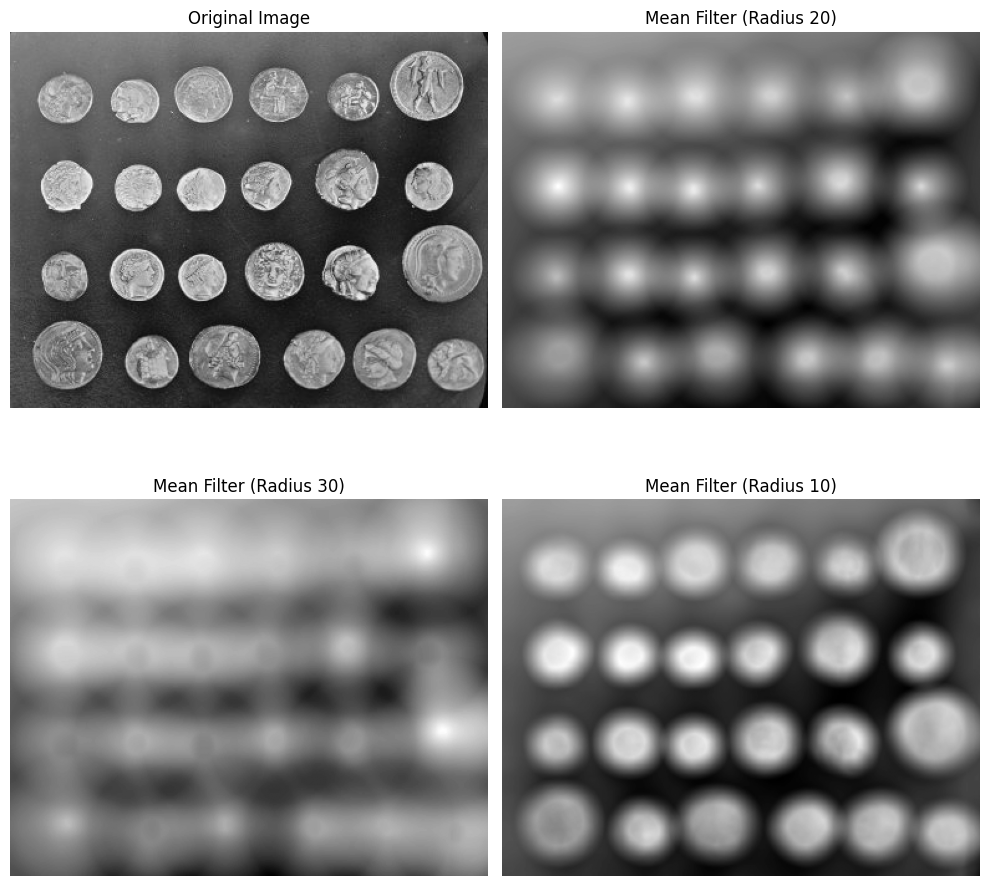

In [70]:

from skimage import data, filters, morphology

# Step 1: Load the coins image
original_image = data.coins()

# Step 2: Define the structuring element with radius 20
radius = 20
selem = morphology.disk(radius)

# Step 3: Apply mean filter with radius 20
smoothed_image_20 = filters.rank.mean(original_image, selem)

# Step 4: Increase radius to 30 and apply mean filter
radius_30 = radius + 10
selem_30 = morphology.disk(radius_30)
smoothed_image_30 = filters.rank.mean(original_image, selem_30)

# Step 5: Reduce radius to 10 and apply mean filter
radius_10 = radius - 10
selem_10 = morphology.disk(radius_10)
smoothed_image_10 = filters.rank.mean(original_image, selem_10)

# Step 6: Plotting
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Original image
axs[0, 0].imshow(original_image, cmap='gray')
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

# Smoothed image with radius 20
axs[0, 1].imshow(smoothed_image_20, cmap='gray')
axs[0, 1].set_title('Mean Filter (Radius 20)')
axs[0, 1].axis('off')

# Smoothed image with radius 30
axs[1, 0].imshow(smoothed_image_30, cmap='gray')
axs[1, 0].set_title('Mean Filter (Radius 30)')
axs[1, 0].axis('off')

# Smoothed image with radius 10
axs[1, 1].imshow(smoothed_image_10, cmap='gray')
axs[1, 1].set_title('Mean Filter (Radius 10)')
axs[1, 1].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

*   Use different selem (square, rectangle, star, diamond) to view the behaviour of the mean filter (It is not necessary to repeat with different sizes; it is sufficient to show the one with optimal parameter).
*   Create a 2 x n subplot to show the selem in the first row and the corresponding smoothened image in the second row.

<ipython-input-72-a94ac51b1d6e>:6: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  "Square": morphology.square(20),
<ipython-input-72-a94ac51b1d6e>:7: FutureWarning: `rectangle` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  "Rectangle": morphology.rectangle(20, 10),


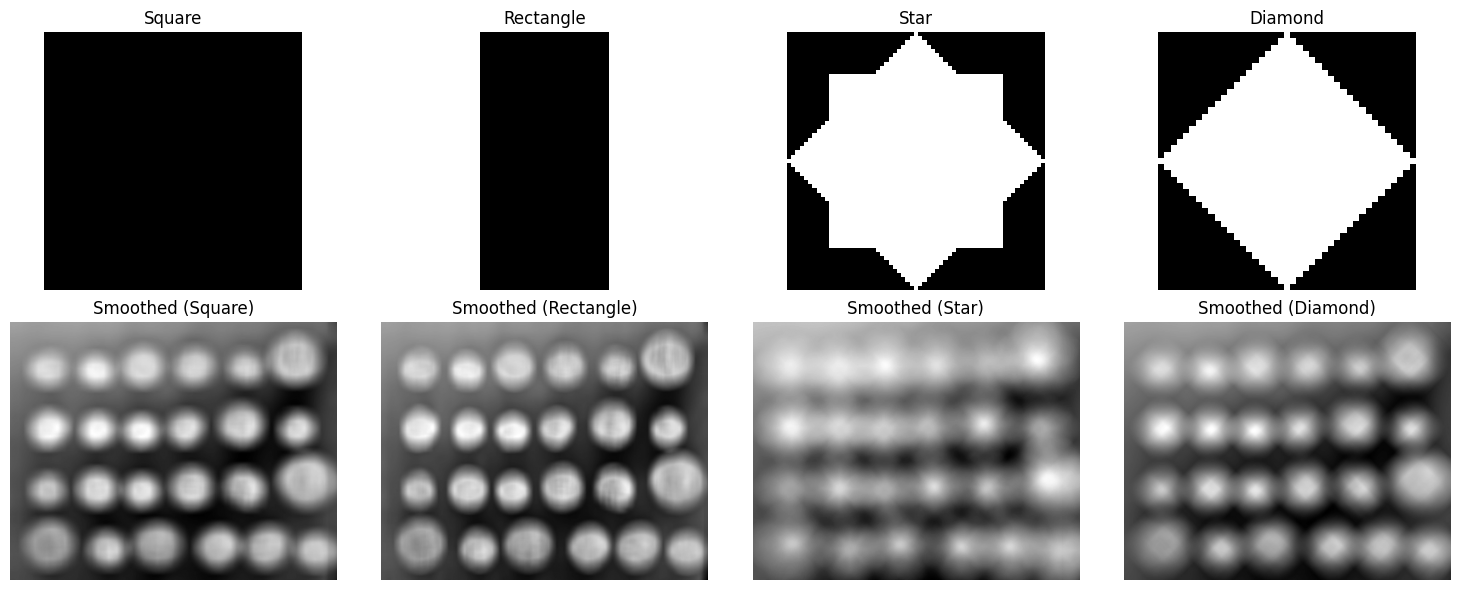

In [72]:

# Step 1: Load the coins image
original_image = data.coins()

# Step 2: Define different structuring elements
selems = {
    "Square": morphology.square(20),
    "Rectangle": morphology.rectangle(20, 10),
    "Star": morphology.star(20),
    "Diamond": morphology.diamond(20)
}

# Step 3: Apply mean filter for each selem
smoothed_images = {name: filters.rank.mean(original_image, selem) for name, selem in selems.items()}

# Step 4: Plotting
n = len(selems)
fig, axs = plt.subplots(2, n, figsize=(15, 6))

# Display each selem and its corresponding smoothed image
for i, (name, selem) in enumerate(selems.items()):
    # Show selem
    axs[0, i].imshow(selem, cmap='gray')
    axs[0, i].set_title(name)
    axs[0, i].axis('off')

    # Show smoothed image
    axs[1, i].imshow(smoothed_images[name], cmap='gray')
    axs[1, i].set_title(f'Smoothed ({name})')
    axs[1, i].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

*   How does changing the radius of disk affect the smoothing functionality?

**Solution**

Changing the radius of a disk structuring element in a mean filter affects smoothing by balancing noise reduction and detail preservation. Larger radii provide greater smoothing, potentially blurring edges and fine details, while smaller radii preserve more features but leave some noise. The optimal radius depends on the specific goals of the image processing task.
...


*   What is the observed behaviour with difference in the structuring element?



**Solution**

Different structuring elements in a mean filter affect smoothing behavior by influencing pixel averaging based on their shape. Circular elements (like disks) provide uniform smoothing, while square and rectangular shapes can create blocky effects. More complex shapes, such as stars and diamonds, tend to preserve edges better but may retain some noise. The choice of structuring element impacts the balance between noise reduction and detail retention.
...



*   What is the difference between mean filter and gaussian filter?
*   Where do you use mean filters and where do you use gaussian filters?



**Solution**

Mean filters average pixel values equally within a neighborhood, leading to uniform smoothing but potential edge blurring. In contrast, Gaussian filters use a weighted average, giving more influence to central pixels, resulting in better edge preservation and smoother transitions. Mean filters are suitable for basic noise reduction, while Gaussian filters are preferred for applications requiring detail retention and smoother results. The choice depends on the specific image processing needs.
...